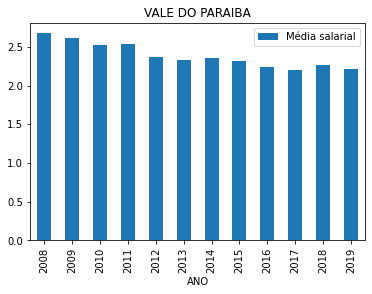

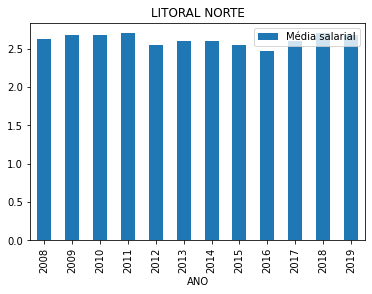

In [49]:
# 4.1
import pandas as pd
import plotly.graph_objects as go
from cobertura import abrangencia
import csv

csvCadastroCentral = './dados/cadastro_central_de_empresas.csv'
dataCadastroCentral = pd.read_csv(csvCadastroCentral, sep= ',', encoding='utf-8')


def createQuery(list, region):
        count = 0
        query = ""
        keyValList = [region]
        expectedResult = [d for d in list if d['regiao'] in keyValList]
        
        for abr_code in list:
                if abr_code["regiao"] == region :
                        query += 'Localidade == "' + str(abr_code["nome"] + '" ')
                        count += 1
                        if count < len(expectedResult):
                                query += ' or '
        return query

anos = ['2008','2009', '2010','2011','2012','2013', '2014', '2015', '2016', '2017', '2018', '2019']

def generateChart(regiao):
        query = createQuery(abrangencia, regiao)
        nCidades = [n for n in abrangencia if n['regiao'] in regiao]
        dfmCadastroCentralRegiao = pd.DataFrame(data = dataCadastroCentral.query(query))
        dfmCadastroCentral = pd.DataFrame(data = dfmCadastroCentralRegiao.query('Nome == "Salário médio mensal"'), columns=anos)

        total = dfmCadastroCentral.sum(axis=0)
        dfTotal = pd.DataFrame(total)

        listResults = []

        for ano in anos:
                mediaSaraialAnos = dfTotal.loc[ano] / len(nCidades)
                dft = pd.DataFrame({"ANO": ano, "Média salarial": mediaSaraialAnos})
                listResults.append(dft)

        dfm = pd.concat(listResults)
        dfm.plot(kind="bar", x="ANO", title=regiao)

generateChart('VALE DO PARAIBA')
generateChart('LITORAL NORTE')


Cidade: APARECIDA
Total de jovens: 5869
Total de idosos: 6446
Cidade: CAÇAPAVA
Total de jovens: 15375
Total de idosos: 16078
Cidade: CACHOEIRA PAULISTA
Total de jovens: 5098
Total de idosos: 6096
Cidade: CANAS
Total de jovens: 949
Total de idosos: 724
Cidade: CUNHA
Total de jovens: 3712
Total de idosos: 3418
Cidade: GUARATINGUETÁ
Total de jovens: 19191
Total de idosos: 22030
Cidade: IGARATÁ
Total de jovens: 1962
Total de idosos: 2045
Cidade: JACAREÍ
Total de jovens: 36304
Total de idosos: 37589
Cidade: JAMBEIRO
Total de jovens: 1048
Total de idosos: 1083
Cidade: LAGOINHA
Total de jovens: 997
Total de idosos: 1309
Cidade: LORENA
Total de jovens: 13206
Total de idosos: 15468
Cidade: NATIVIDADE DA SERRA
Total de jovens: 1069
Total de idosos: 1823
Cidade: PARAIBUNA
Total de jovens: 2971
Total de idosos: 3425
Cidade: PINDAMONHANGABA
Total de jovens: 25987
Total de idosos: 25396
Cidade: PIQUETE
Total de jovens: 1923
Total de idosos: 2444
Cidade: POTIM
Total de jovens: 3032
Total de idosos: 2

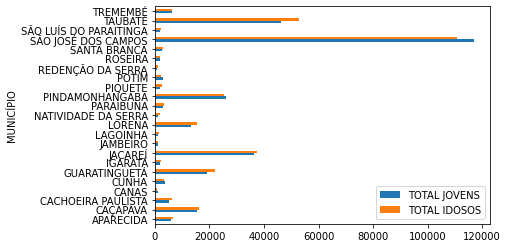

In [4]:
# regiao = "VALE DO PARAIBA"
# listaCidades = []

# for abr_item in abrangencia:
#     if abr_item['regiao'] == regiao:
#         listaCidades.append(abr_item)

# query = createQuery(listaCidades)
# generateChart(listaCidades, regiao, 'PerfilEleitorado_' + regiao.replace(" ", "_"))